In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
def display_high_number(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [3]:
def prepare_mode_data(samples):
    return [ float(f'{s:.2f}') for s in samples]

In [4]:
if not os.path.exists('images/convergence'):
    os.makedirs('images/convergence')

# Convergence study

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/ssim_comparisons_all_jung.csv', sep=";", header=None)

In [7]:
def display_high_number_50(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [8]:
def plot_scene_M(df, scene_name, regex_title, ylim, yticks):
    
    labels = [r'Jung et al.', r'$G$-MoN$_b$', r'$G$-MoN', r'$GG$-MoN', r'$D$-MoN$_p$', r'$G$-MoN$_p$', r'Mean', r'MoN']
    order = [6, 7, 0, 1, 2]

    scene_df = df[df.loc[:, 1] == scene_name]
    scene_df = scene_df[df.loc[:, 0].str.contains(regex_title)]
    print(scene_df)
    
    print(scene_name, ' ', regex_title)

    params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 32,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

    plt.rcParams.update(params)


    plt.margins(tight=True)
    plt.tick_params(axis='both', width=2, length=15)

    for i in order:
        row = scene_df.iloc[i]
        if labels[i] == r'Mean':
            plt.plot(row[2:201], label=labels[i], lw=4, alpha=0.8, linestyle='--')
        else:
            plt.plot(row[2:201], label=labels[i], lw=4, alpha=0.8)
    
    #plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
    plt.xticks(np.arange(0, 220, step=40), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
    plt.yticks(yticks, prepare_mode_data(yticks))

    plt.xlabel(r'$n$')
    plt.ylabel('SSIM')

    plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.27), shadow=True, ncol=3, columnspacing=0.8, handletextpad=0.6)
    plt.ylim(ylim)
    plt.savefig(f'images/convergence/{scene_name}_{regex_title}_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
    plt.clf()
    #plt.show()

In [9]:
ylims = [(0.5, 1.0), (0.8, 1.0), (0.96, 1.0), (0.75, 1.0)]
yticks = [np.arange(0.5, 1.1, step=0.1), np.arange(0.8, 1.1, step=0.04), np.arange(0.96, 1.1, step=0.01), np.arange(0.75, 1.1, step=0.05)]
for i, scene in enumerate(['p3d_bidir', 'p3d_contemporary-bathroom', 'p3d_crown', 'p3d_villa-lights-on']):
    for m in [5, 11, 15, 21, 25]:
        plot_scene_M(df, scene, f'comparisons-M{m}', ylims[i], yticks[i])

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
128              comparisons-M5-djung  p3d_bidir  0.316072  0.368086   
132    comparisons-M5-gini-binary-mon  p3d_bidir  0.472471  0.559867   
136          comparisons-M5-gini-dmon  p3d_bidir  0.485287  0.568272   
140           comparisons-M5-gini-mon  p3d_bidir  0.400062  0.453745   
144  comparisons-M5-gini-partial-dmon  p3d_bidir  0.474234  0.550719   
148   comparisons-M5-gini-partial-mon  p3d_bidir  0.376550  0.433879   
152               comparisons-M5-mean  p3d_bidir  0.318588  0.358668   
156                comparisons-M5-mon  p3d_bidir  0.462270  0.552171   

          4         5         6         7         8         9    ...  \
128  0.393944  0.410186  0.438181  0.461649  0.481849  0.498911  ...   
132  0.601290  0.626001  0.642147  0.653442  0.662546  0.670156  ...   
136  0.611227  0.638382  0.657784  0.672551  0.684728  0.695289  ...   
140  0.483467  0.503862  0.519201  0.531612  0.543049  0.552952

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
0               comparisons-M11-djung  p3d_bidir  0.316072  0.368086   
4     comparisons-M11-gini-binary-mon  p3d_bidir  0.488642  0.597413   
8           comparisons-M11-gini-dmon  p3d_bidir  0.540299  0.644751   
12           comparisons-M11-gini-mon  p3d_bidir  0.531528  0.626419   
16  comparisons-M11-gini-partial-dmon  p3d_bidir  0.530187  0.627686   
20   comparisons-M11-gini-partial-mon  p3d_bidir  0.493482  0.584146   
24               comparisons-M11-mean  p3d_bidir  0.317710  0.358025   
28                comparisons-M11-mon  p3d_bidir  0.486405  0.594035   

         4         5         6         7         8         9    ...       192  \
0   0.393944  0.410186  0.438181  0.461649  0.481849  0.498911  ...  0.848841   
4   0.651335  0.682925  0.703743  0.718043  0.728827  0.736649  ...  0.869742   
8   0.695274  0.725308  0.745777  0.760961  0.772710  0.782488  ...  0.919365   
12  0.671225  0.697380  0.7

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
32              comparisons-M15-djung  p3d_bidir  0.316072  0.368086   
36    comparisons-M15-gini-binary-mon  p3d_bidir  0.488262  0.602675   
40          comparisons-M15-gini-dmon  p3d_bidir  0.547889  0.660743   
44           comparisons-M15-gini-mon  p3d_bidir  0.541159  0.653062   
48  comparisons-M15-gini-partial-dmon  p3d_bidir  0.541053  0.644642   
52   comparisons-M15-gini-partial-mon  p3d_bidir  0.526935  0.629060   
56               comparisons-M15-mean  p3d_bidir  0.320724  0.360873   
60                comparisons-M15-mon  p3d_bidir  0.488833  0.602456   

         4         5         6         7         8         9    ...       192  \
32  0.393944  0.410186  0.438181  0.461649  0.481849  0.498911  ...  0.848841   
36  0.661151  0.695613  0.717661  0.733902  0.745928  0.754556  ...  0.877133   
40  0.715068  0.747617  0.768962  0.784761  0.796796  0.806382  ...  0.929582   
44  0.706797  0.738837  0.7

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
64              comparisons-M21-djung  p3d_bidir  0.316072  0.368086   
68    comparisons-M21-gini-binary-mon  p3d_bidir  0.485067  0.605370   
72          comparisons-M21-gini-dmon  p3d_bidir  0.547895  0.672032   
76           comparisons-M21-gini-mon  p3d_bidir  0.534159  0.660566   
80  comparisons-M21-gini-partial-dmon  p3d_bidir  0.551803  0.661688   
84   comparisons-M21-gini-partial-mon  p3d_bidir  0.530415  0.644243   
88               comparisons-M21-mean  p3d_bidir  0.318674  0.359633   
92                comparisons-M21-mon  p3d_bidir  0.487386  0.608425   

         4         5         6         7         8         9    ...       192  \
64  0.393944  0.410186  0.438181  0.461649  0.481849  0.498911  ...  0.848841   
68  0.667136  0.704978  0.729571  0.746971  0.759867  0.769862  ...  0.884123   
72  0.730622  0.765777  0.789117  0.805447  0.817784  0.827702  ...  0.938618   
76  0.722286  0.759736  0.7

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                   0          1         2         3    \
96               comparisons-M25-djung  p3d_bidir  0.316072  0.368086   
100    comparisons-M25-gini-binary-mon  p3d_bidir  0.480974  0.605958   
104          comparisons-M25-gini-dmon  p3d_bidir  0.544580  0.675449   
108           comparisons-M25-gini-mon  p3d_bidir  0.525753  0.659011   
112  comparisons-M25-gini-partial-dmon  p3d_bidir  0.553466  0.667344   
116   comparisons-M25-gini-partial-mon  p3d_bidir  0.523618  0.643860   
120               comparisons-M25-mean  p3d_bidir  0.318047  0.359339   
124                comparisons-M25-mon  p3d_bidir  0.483887  0.610296   

          4         5         6         7         8         9    ...  \
96   0.393944  0.410186  0.438181  0.461649  0.481849  0.498911  ...   
100  0.668558  0.707952  0.733854  0.752649  0.765909  0.775989  ...   
104  0.735561  0.771734  0.795609  0.813190  0.826073  0.836145  ...   
108  0.723050  0.762695  0.789028  0.808570  0.822941 

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                          1         2    \
129              comparisons-M5-djung  p3d_contemporary-bathroom  0.450947   
133    comparisons-M5-gini-binary-mon  p3d_contemporary-bathroom  0.555438   
137          comparisons-M5-gini-dmon  p3d_contemporary-bathroom  0.560800   
141           comparisons-M5-gini-mon  p3d_contemporary-bathroom  0.549322   
145  comparisons-M5-gini-partial-dmon  p3d_contemporary-bathroom  0.561910   
149   comparisons-M5-gini-partial-mon  p3d_contemporary-bathroom  0.546708   
153               comparisons-M5-mean  p3d_contemporary-bathroom  0.507272   
157                comparisons-M5-mon  p3d_contemporary-bathroom  0.544676   

          3         4         5         6         7         8         9    \
129  0.567108  0.629704  0.672654  0.704927  0.730309  0.750925  0.768216   
133  0.626055  0.663674  0.691932  0.715869  0.736631  0.754699  0.770725   
137  0.625819  0.664427  0.692940  0.716090  0.735226  0.751577  0

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                          1         2    \
1               comparisons-M11-djung  p3d_contemporary-bathroom  0.450947   
5     comparisons-M11-gini-binary-mon  p3d_contemporary-bathroom  0.559339   
9           comparisons-M11-gini-dmon  p3d_contemporary-bathroom  0.598284   
13           comparisons-M11-gini-mon  p3d_contemporary-bathroom  0.601831   
17  comparisons-M11-gini-partial-dmon  p3d_contemporary-bathroom  0.601183   
21   comparisons-M11-gini-partial-mon  p3d_contemporary-bathroom  0.604450   
25               comparisons-M11-mean  p3d_contemporary-bathroom  0.507528   
29                comparisons-M11-mon  p3d_contemporary-bathroom  0.555828   

         3         4         5         6         7         8         9    ...  \
1   0.567108  0.629704  0.672654  0.704927  0.730309  0.750925  0.768216  ...   
5   0.655148  0.698279  0.724128  0.742280  0.756310  0.767881  0.778444  ...   
9   0.684456  0.719222  0.740815  0.756549  0.769312  

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                          1         2    \
33              comparisons-M15-djung  p3d_contemporary-bathroom  0.450947   
37    comparisons-M15-gini-binary-mon  p3d_contemporary-bathroom  0.545561   
41          comparisons-M15-gini-dmon  p3d_contemporary-bathroom  0.592020   
45           comparisons-M15-gini-mon  p3d_contemporary-bathroom  0.589846   
49  comparisons-M15-gini-partial-dmon  p3d_contemporary-bathroom  0.600280   
53   comparisons-M15-gini-partial-mon  p3d_contemporary-bathroom  0.599938   
57               comparisons-M15-mean  p3d_contemporary-bathroom  0.507032   
61                comparisons-M15-mon  p3d_contemporary-bathroom  0.543300   

         3         4         5         6         7         8         9    ...  \
33  0.567108  0.629704  0.672654  0.704927  0.730309  0.750925  0.768216  ...   
37  0.656733  0.705312  0.734464  0.754407  0.768845  0.779833  0.789036  ...   
41  0.695995  0.737022  0.759904  0.775541  0.787482  

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                          1         2    \
65              comparisons-M21-djung  p3d_contemporary-bathroom  0.450947   
69    comparisons-M21-gini-binary-mon  p3d_contemporary-bathroom  0.517685   
73          comparisons-M21-gini-dmon  p3d_contemporary-bathroom  0.568581   
77           comparisons-M21-gini-mon  p3d_contemporary-bathroom  0.553873   
81  comparisons-M21-gini-partial-dmon  p3d_contemporary-bathroom  0.593443   
85   comparisons-M21-gini-partial-mon  p3d_contemporary-bathroom  0.566187   
89               comparisons-M21-mean  p3d_contemporary-bathroom  0.506763   
93                comparisons-M21-mon  p3d_contemporary-bathroom  0.516814   

         3         4         5         6         7         8         9    ...  \
65  0.567108  0.629704  0.672654  0.704927  0.730309  0.750925  0.768216  ...   
69  0.652674  0.708263  0.740558  0.762753  0.778886  0.791185  0.801098  ...   
73  0.698768  0.748933  0.776003  0.793411  0.805487  

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                   0                          1         2    \
97               comparisons-M25-djung  p3d_contemporary-bathroom  0.450947   
101    comparisons-M25-gini-binary-mon  p3d_contemporary-bathroom  0.496701   
105          comparisons-M25-gini-dmon  p3d_contemporary-bathroom  0.548532   
109           comparisons-M25-gini-mon  p3d_contemporary-bathroom  0.527331   
113  comparisons-M25-gini-partial-dmon  p3d_contemporary-bathroom  0.581385   
117   comparisons-M25-gini-partial-mon  p3d_contemporary-bathroom  0.539846   
121               comparisons-M25-mean  p3d_contemporary-bathroom  0.507327   
125                comparisons-M25-mon  p3d_contemporary-bathroom  0.496360   

          3         4         5         6         7         8         9    \
97   0.567108  0.629704  0.672654  0.704927  0.730309  0.750925  0.768216   
101  0.646372  0.707666  0.741862  0.765126  0.782217  0.795150  0.805515   
105  0.695418  0.751399  0.781041  0.799915  0.813073  0.

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
130              comparisons-M5-djung  p3d_crown  0.848715  0.911135   
134    comparisons-M5-gini-binary-mon  p3d_crown  0.892388  0.925410   
138          comparisons-M5-gini-dmon  p3d_crown  0.911241  0.938694   
142           comparisons-M5-gini-mon  p3d_crown  0.896993  0.930493   
146  comparisons-M5-gini-partial-dmon  p3d_crown  0.896453  0.927951   
150   comparisons-M5-gini-partial-mon  p3d_crown  0.895118  0.928118   
154               comparisons-M5-mean  p3d_crown  0.887803  0.926268   
158                comparisons-M5-mon  p3d_crown  0.896600  0.927294   

          4         5         6         7         8         9    ...  \
130  0.934278  0.946653  0.954635  0.960102  0.964094  0.967314  ...   
134  0.942088  0.952061  0.958842  0.963620  0.967301  0.970202  ...   
138  0.950910  0.958313  0.963452  0.967174  0.970065  0.972377  ...   
142  0.945796  0.954861  0.961033  0.965417  0.968795  0.971448

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
2               comparisons-M11-djung  p3d_crown  0.848715  0.911135   
6     comparisons-M11-gini-binary-mon  p3d_crown  0.895373  0.924903   
10          comparisons-M11-gini-dmon  p3d_crown  0.921158  0.946365   
14           comparisons-M11-gini-mon  p3d_crown  0.913060  0.940254   
18  comparisons-M11-gini-partial-dmon  p3d_crown  0.904818  0.930769   
22   comparisons-M11-gini-partial-mon  p3d_crown  0.907807  0.932733   
26               comparisons-M11-mean  p3d_crown  0.887725  0.926270   
30                comparisons-M11-mon  p3d_crown  0.896486  0.931418   

         4         5         6         7         8         9    ...       192  \
2   0.934278  0.946653  0.954635  0.960102  0.964094  0.967314  ...  0.992568   
6   0.940289  0.950133  0.956988  0.961966  0.965712  0.968738  ...  0.993722   
10  0.956651  0.963010  0.967354  0.970578  0.973070  0.975065  ...  0.993751   
14  0.952094  0.959312  0.9

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
34              comparisons-M15-djung  p3d_crown  0.848715  0.911135   
38    comparisons-M15-gini-binary-mon  p3d_crown  0.893211  0.924154   
42          comparisons-M15-gini-dmon  p3d_crown  0.921520  0.948303   
46           comparisons-M15-gini-mon  p3d_crown  0.916176  0.943875   
50  comparisons-M15-gini-partial-dmon  p3d_crown  0.906061  0.932021   
54   comparisons-M15-gini-partial-mon  p3d_crown  0.907020  0.932637   
58               comparisons-M15-mean  p3d_crown  0.887989  0.926090   
62                comparisons-M15-mon  p3d_crown  0.893243  0.931137   

         4         5         6         7         8         9    ...       192  \
34  0.934278  0.946653  0.954635  0.960102  0.964094  0.967314  ...  0.992568   
38  0.939402  0.948930  0.955796  0.960910  0.964784  0.967829  ...  0.993713   
42  0.958600  0.964303  0.968344  0.971469  0.973792  0.975706  ...  0.993783   
46  0.955178  0.961468  0.9

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0          1         2         3    \
66              comparisons-M21-djung  p3d_crown  0.848715  0.911135   
70    comparisons-M21-gini-binary-mon  p3d_crown  0.887836  0.922352   
74          comparisons-M21-gini-dmon  p3d_crown  0.918221  0.948525   
78           comparisons-M21-gini-mon  p3d_crown  0.912393  0.944643   
82  comparisons-M21-gini-partial-dmon  p3d_crown  0.906303  0.933198   
86   comparisons-M21-gini-partial-mon  p3d_crown  0.900235  0.929838   
90               comparisons-M21-mean  p3d_crown  0.887886  0.926219   
94                comparisons-M21-mon  p3d_crown  0.887319  0.929150   

         4         5         6         7         8         9    ...       192  \
66  0.934278  0.946653  0.954635  0.960102  0.964094  0.967314  ...  0.992568   
70  0.938030  0.947594  0.954366  0.959434  0.963404  0.966620  ...  0.993687   
74  0.959471  0.965496  0.969470  0.972235  0.974446  0.976232  ...  0.993783   
78  0.956764  0.963352  0.9

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                   0          1         2         3    \
98               comparisons-M25-djung  p3d_crown  0.848715  0.911135   
102    comparisons-M25-gini-binary-mon  p3d_crown  0.885044  0.920996   
106          comparisons-M25-gini-dmon  p3d_crown  0.916932  0.948517   
110           comparisons-M25-gini-mon  p3d_crown  0.909297  0.943816   
114  comparisons-M25-gini-partial-dmon  p3d_crown  0.906067  0.933346   
118   comparisons-M25-gini-partial-mon  p3d_crown  0.896342  0.927863   
122               comparisons-M25-mean  p3d_crown  0.888045  0.926187   
126                comparisons-M25-mon  p3d_crown  0.884619  0.927891   

          4         5         6         7         8         9    ...  \
98   0.934278  0.946653  0.954635  0.960102  0.964094  0.967314  ...   
102  0.937337  0.946938  0.953569  0.958480  0.962514  0.965792  ...   
106  0.959912  0.965906  0.969783  0.972545  0.974702  0.976457  ...   
110  0.956862  0.963712  0.967991  0.970933  0.973181 

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                    1         2    \
131              comparisons-M5-djung  p3d_villa-lights-on  0.592288   
135    comparisons-M5-gini-binary-mon  p3d_villa-lights-on  0.723363   
139          comparisons-M5-gini-dmon  p3d_villa-lights-on  0.732917   
143           comparisons-M5-gini-mon  p3d_villa-lights-on  0.704316   
147  comparisons-M5-gini-partial-dmon  p3d_villa-lights-on  0.733067   
151   comparisons-M5-gini-partial-mon  p3d_villa-lights-on  0.664062   
155               comparisons-M5-mean  p3d_villa-lights-on  0.602709   
159                comparisons-M5-mon  p3d_villa-lights-on  0.719372   

          3         4         5         6         7         8         9    \
131  0.629515  0.665197  0.686276  0.703154  0.713333  0.723264  0.732662   
135  0.779452  0.806144  0.821992  0.832350  0.839188  0.844305  0.848263   
139  0.785990  0.809655  0.823463  0.832812  0.839155  0.844019  0.847817   
143  0.746542  0.767124  0.780137  0.789396

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                    1         2    \
3               comparisons-M11-djung  p3d_villa-lights-on  0.592288   
7     comparisons-M11-gini-binary-mon  p3d_villa-lights-on  0.701870   
11          comparisons-M11-gini-dmon  p3d_villa-lights-on  0.723356   
15           comparisons-M11-gini-mon  p3d_villa-lights-on  0.730298   
19  comparisons-M11-gini-partial-dmon  p3d_villa-lights-on  0.731758   
23   comparisons-M11-gini-partial-mon  p3d_villa-lights-on  0.726440   
27               comparisons-M11-mean  p3d_villa-lights-on  0.601572   
31                comparisons-M11-mon  p3d_villa-lights-on  0.700687   

         3         4         5         6         7         8         9    ...  \
3   0.629515  0.665197  0.686276  0.703154  0.713333  0.723264  0.732662  ...   
7   0.776430  0.810493  0.830340  0.844009  0.853842  0.861329  0.867104  ...   
11  0.796638  0.828074  0.845670  0.857442  0.865620  0.871936  0.876767  ...   
15  0.800900  0.830669  0.8

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                    1         2    \
35              comparisons-M15-djung  p3d_villa-lights-on  0.592288   
39    comparisons-M15-gini-binary-mon  p3d_villa-lights-on  0.677941   
43          comparisons-M15-gini-dmon  p3d_villa-lights-on  0.701477   
47           comparisons-M15-gini-mon  p3d_villa-lights-on  0.699986   
51  comparisons-M15-gini-partial-dmon  p3d_villa-lights-on  0.716889   
55   comparisons-M15-gini-partial-mon  p3d_villa-lights-on  0.716287   
59               comparisons-M15-mean  p3d_villa-lights-on  0.600806   
63                comparisons-M15-mon  p3d_villa-lights-on  0.676950   

         3         4         5         6         7         8         9    ...  \
35  0.629515  0.665197  0.686276  0.703154  0.713333  0.723264  0.732662  ...   
39  0.767419  0.804986  0.826810  0.841828  0.852595  0.860895  0.867321  ...   
43  0.789396  0.825033  0.845080  0.858354  0.867617  0.874519  0.879868  ...   
47  0.788648  0.824741  0.8

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                  0                    1         2    \
67              comparisons-M21-djung  p3d_villa-lights-on  0.592288   
71    comparisons-M21-gini-binary-mon  p3d_villa-lights-on  0.639110   
75          comparisons-M21-gini-dmon  p3d_villa-lights-on  0.662904   
79           comparisons-M21-gini-mon  p3d_villa-lights-on  0.654025   
83  comparisons-M21-gini-partial-dmon  p3d_villa-lights-on  0.696789   
87   comparisons-M21-gini-partial-mon  p3d_villa-lights-on  0.671347   
91               comparisons-M21-mean  p3d_villa-lights-on  0.601961   
95                comparisons-M21-mon  p3d_villa-lights-on  0.638314   

         3         4         5         6         7         8         9    ...  \
67  0.629515  0.665197  0.686276  0.703154  0.713333  0.723264  0.732662  ...   
71  0.748955  0.793837  0.819140  0.835744  0.847661  0.856605  0.863867  ...   
75  0.771019  0.814406  0.838289  0.853573  0.864323  0.872275  0.878411  ...   
79  0.764283  0.808945  0.8

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                                   0                    1         2    \
99               comparisons-M25-djung  p3d_villa-lights-on  0.592288   
103    comparisons-M25-gini-binary-mon  p3d_villa-lights-on  0.615557   
107          comparisons-M25-gini-dmon  p3d_villa-lights-on  0.638757   
111           comparisons-M25-gini-mon  p3d_villa-lights-on  0.627392   
115  comparisons-M25-gini-partial-dmon  p3d_villa-lights-on  0.679103   
119   comparisons-M25-gini-partial-mon  p3d_villa-lights-on  0.642022   
123               comparisons-M25-mean  p3d_villa-lights-on  0.603265   
127                comparisons-M25-mon  p3d_villa-lights-on  0.614810   

          3         4         5         6         7         8         9    \
99   0.629515  0.665197  0.686276  0.703154  0.713333  0.723264  0.732662   
103  0.734938  0.784804  0.812776  0.830468  0.843293  0.853073  0.860805   
107  0.756813  0.805375  0.831783  0.848499  0.860403  0.869202  0.876120   
111  0.747545  0.797459  0.825106 

<Figure size 1296x720 with 0 Axes>

NameError: name 'order' is not defined

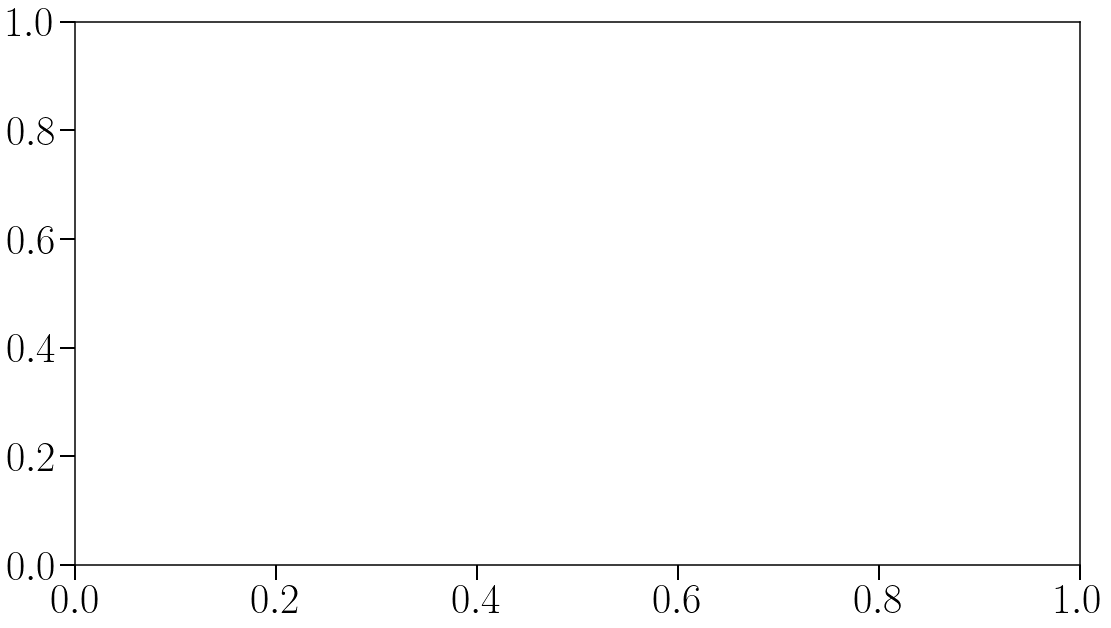

In [10]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:201], label=labels[i], lw=4, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 220, step=40), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.4, 1.1, step=0.1), prepare_mode_data(np.arange(0.4, 1.1, step=0.1)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.4, 1))
plt.savefig('images/gmon_p3d_bidir_M21_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [ ]:
scene_df = df[df.loc[:, 1] == 'p3d_crown']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 8)}

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:201], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 220, step=40), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.98, 1.02, step=0.01), prepare_mode_data(np.arange(0.98, 1.02, step=0.01)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.98, 1))
plt.savefig('images/gmon_p3d_crown_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
scene_df = df[df.loc[:, 1] == 'p3d_villa-lights-on']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:2002], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 2200, step=400), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.85, 1.01, step=0.02), prepare_mode_data(np.arange(0.85, 1.01, step=0.02)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.88, 1))
plt.savefig('images/gmon_p3d_villa_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()
scene_df